In [5]:
#See: http://machinelearningmastery.com/machine-learning-in-python-step-by-step/
import pandas
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt
#from sklearn import model_selection #for version 0.18.1
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC


       sepal-length  sepal-width  petal-length  petal-width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64
    sepal-length  sepal-width  petal-length  petal-width        class
0            5.1          3.5           1.4          0.2  Iris-setosa
1            4.9          3.0           1.4          0.2  Iris-setosa
2            4.7          3.2           1.3          0.2  Iris-setosa
3            4.6          3.1           1.5          0.2  Iris-setosa
4            5.0         

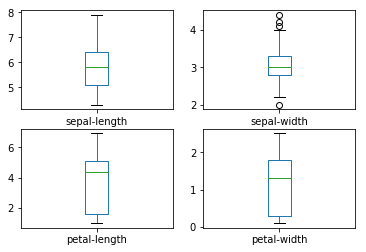

In [6]:


# Load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
feature_names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
#dataset = pandas.read_csv("input/iris.csv", names=feature_names)
dataset = pandas.read_csv(url, names=feature_names)

#PRINT INFO
# descriptions
print(dataset.describe())
# class distribution
print(dataset.groupby('class').size())
print(dataset.head(20))
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

# histograms
#dataset.hist()
#plt.show()

# scatter plot matrix
#scatter_matrix(dataset)
#plt.show()


LR: 0.800000 (0.400000)
LDA: 1.000000 (0.000000)
KNN: 0.500000 (0.500000)
CART: 0.800000 (0.400000)
NB: 0.700000 (0.458258)
SVM: 0.700000 (0.458258)


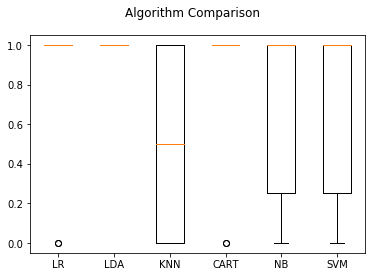

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label=<petal-width &le; 0.8<br/>gini = 0.6657<br/>samples = 120<br/>value = [43, 38, 39]<br/>class = Iris-versicolor>, fillcolor="#e581390d"] ;
1 [label=<gini = 0.0<br/>samples = 43<br/>value = [43, 0, 0]<br/>class = Iris-versicolor>, fillcolor="#e58139ff"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label=<petal-width &le; 1.7<br/>gini = 0.4999<br/>samples = 77<br/>value = [0, 38, 39]<br/>class = Iris-virginica>, fillcolor="#8139e507"] ;
0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;
3 [label=<petal-

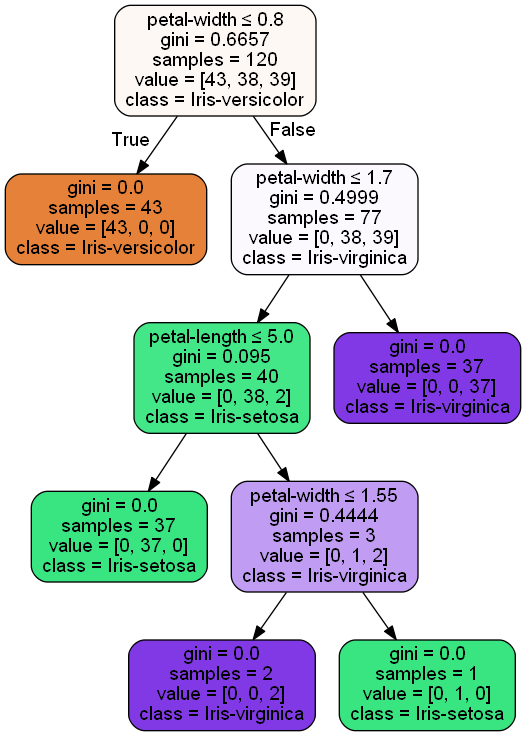

In [9]:

# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y, test_size=validation_size, random_state=seed)


# Test options and evaluation metric
seed = 7
scoring = 'accuracy'

# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = cross_validation.KFold(n=10, n_folds=10, random_state=seed)
    #kfold = model_selection.KFold(n_splits=10, random_state=seed) #version 0.18.1
    cv_results = cross_validation.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    
 # Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()   

# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

from sklearn import tree
import pydotplus
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
classes = ['Iris-versicolor', 'Iris-setosa', 'Iris-virginica']

from IPython.display import Image  
dot_data = tree.export_graphviz(dt, out_file=None, 
                             feature_names=feature_names,  
                             class_names=classes,  
                             filled=True, rounded=True, 
                             special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
print (dot_data)

Image(graph.create_png()) 